how to approach 
1. data 
2. exploration
3. data processing 
4. models 
5. evaluation
6. prediction
7. conclution 

1. DATA
The data are from Kaggle. 
Further description and specification can be found at the following link https://www.kaggle.com/competitions/titanic/data
DATA UPLOAD

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# read data in python
train = pd.read_csv(r'C:\Users\elijeldres\OneDrive\Documents\Desktop\data\tableau\titanic\train.csv')
test = pd.read_csv(r"C:\Users\elijeldres\OneDrive\Documents\Desktop\data\tableau\titanic\test.csv")



In [180]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. EXPLORATION

In [181]:
# which columns have the data 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [182]:
# what is the size of the data 
train.shape

(891, 12)

In [183]:
# extra info, null values and data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As seen in train.shape, the dataset call train, has 12 columns with 891 rows. 
With .info() from the 12 columns, the call Age has missing info and cabin has 685 null rows which is a lot also 2 person have no info for embarked column. 

In [184]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
# how to describe categorical variables
train.describe(include =['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Mr. Anders Johan",male,1601,B96 B98,S
freq,1,577,7,4,644


2.1 Exploratory Data Analysis. Target Variable 

In [186]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [187]:
# target vs sex
train.groupby(["Survived","Sex"]).count()["PassengerId"]

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Graphic target vs sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


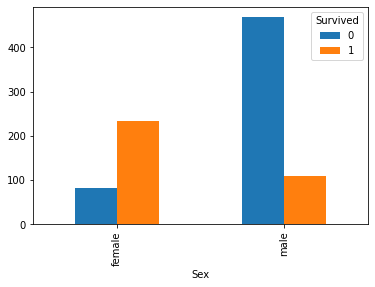

In [188]:
group_sex = train.groupby(["Survived","Sex"]).count()["PassengerId"]
print(group_sex)
(group_sex.unstack(level = 0).plot.bar())
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


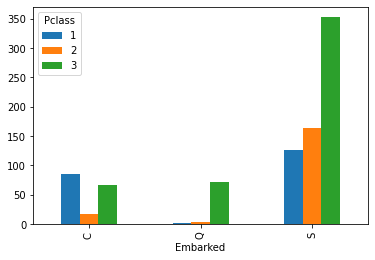

In [189]:
# embarked vs class
print(train.groupby(["Pclass", "Embarked"])
      .count()["PassengerId"]
      .unstack(level = 0)
      .plot.bar())

3. Data processing 
select the variables of interest in the table to answer the question "predict survivors".

In [190]:
train[["Survived", "Sex", "Age", "Pclass"]].head()

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


In [191]:
train[["Survived", "Sex", "Age", "Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


3.2 to do: 
- clean data 
- change Dtype for Sex variable

In [192]:
# how the nulls are distributed (Age)
(train[train["Age"].isna()]
 .groupby(["Sex", "Pclass"])
 .count()["PassengerId"]
 .unstack(level = 0))


Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [193]:
(train[train["Age"].isna()]
 .groupby(["SibSp", "Parch"])
 .count()["PassengerId"]
 .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


annotations: 
Third class men traveling alone are the largest population with no age data. 
For this reason we will occupy the average in the age variable for the missing data.

In [194]:
median_age = train["Age"].median()
median_age

28.0

In [195]:
train["Age"]= train["Age"].fillna(median_age)
train[["Survived","Sex","Age","Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [196]:
# Map label encoding / from datatype object to int. variable "Sex"
train["Sex"] = train["Sex"].map({"female":1 , "male":0}).astype(int)

In [197]:
train[["Survived","Sex","Age","Pclass"]].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


3.1 Create New Variables 

In [198]:
# Create new variable flag "alone"
train["FlagAlone"] = np.where(
    (train["SibSp"] == 0) & (train["Parch"] == 0), 1,0)

Survived  FlagAlone
0         0            175
          1            374
1         0            179
          1            163
Name: PassengerId, dtype: int64


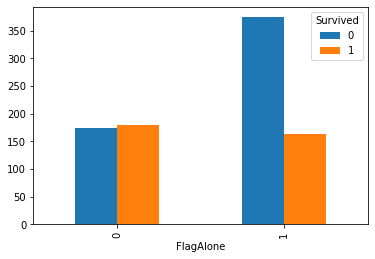

In [199]:
grouped_flag = train.groupby(["Survived", "FlagAlone"]).count()["PassengerId"]
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [200]:
# dependent variable
Y_train = train ["Survived"]

# preprocessing independent variable 
features = ["Sex", "Age", "Pclass", "FlagAlone"]
X_train = train[features]
print(Y_train.shape, X_train.shape)

(891,) (891, 4)


4. Models
* Logistic Regression
* Decision Tree

In [201]:
# training model Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [202]:
# training decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

5. Evaluation 
built a confusion matrix to evaluate the models 

In [203]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, X_train, Y_train,
                                 cmap = plt.cm.Blues, values_format = "d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print("accuracy: ", np.round(accuracy,2))
    plt.show()

accuracy:  0.79


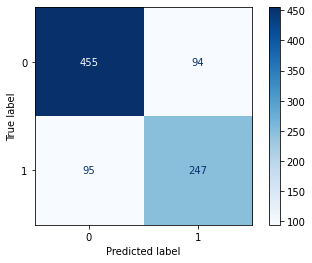

In [211]:
conf_mat_acc(logreg)


accuracy:  0.89


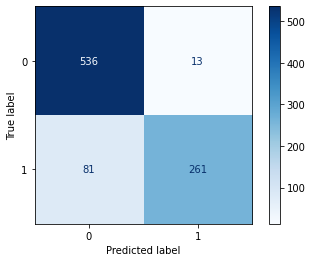

In [205]:
conf_mat_acc(decision_tree)

5.1 Evaluation on Test_set 

In [206]:
print(test.head())
test.info()

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

In [207]:
# preprocessiong test set 

# map to sex
test["Sex"] = test["Sex"].map({"female":1, "male":0}).astype(int)

# fill age
test["Age"] = test["Age"]. fillna(median_age)

# create Flag "Alone"
test["FlagAlone"] = np.where(
    (test["SibSp"]== 0) & (test["Parch"] == 0), 1,0)

In [208]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagAlone    418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB
None


,Sex,Age,Pclass,FlagAlone
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [209]:
# Create test set
X_test = test[features]
print(X_test.shape)

(418, 4)


In [210]:
# Survived prediction. Test set 
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


6. prediction 

In [212]:
# prediction over the test set 
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [213]:
# to download file as csv
def download_output(y_pred, name):
    output = pd.DataFrame({"PassengerId": test.PassengerId, 
                           "Survived": y_pred})
    output.to_csv(name, index= False)   

In [214]:
download_output(Y_pred_log, "Titanic_pred_log.csv")
download_output(Y_pred_tree, "Titanic_pred_tree.csv")